# Moralizing Self-Regulation Studies
## Can we leverage our social relationships to facilitate self-regulatory decision making?
***
<br>

### <font color=blue> Nutrition Domain </font> - Relational and Conceptual Priming
#### Do our social relationships promote regulation **<font color=green>over and above</font>** domain-specific non-social primes?


In this study, participants first typed out three *names*:
1. The name of the person most impacted by the participant's health,
2. The name of person the participant hangs out with the most socially, and 
3. The name of a celebrity the participant likes. 

They also typed out three *words*:
1. A word that they most associate with health,
2. A word that reminds them of hanging out socially, and
3. A word that reminds them of a celebrity


Participants then made a series of decisions in which they allocated time to playing a videogame and reading nutritional tips.
***
<br>

To analyze data from this study, first import the packages we need:


In [1]:
from __future__ import division 
import sys
import os
import pandas as pd
import numpy as np
from numpy import mean, std, cov 
from numpy.random import seed, randn
import matplotlib.pyplot as plt
from matplotlib import pyplot
from math import sqrt
import scipy
from scipy.stats import t, pearsonr
import seaborn as sns
from statistics import mean, stdev
import statsmodels.api as sm
import statsmodels.formula.api as smf #for glm and more

<br>
Let's then read in the data -- `longDF` is going to refer to our csv with all of the behavioral data *and* the self-report data. Each participant will have 120 lines of data for every trial. 

In [2]:
os.chdir("F://Moralizing Self-Regulation//Nutrition//Nutrition Time Allocations//data//files")
longDF = pd.read_csv("Behavioral_Nutr.csv")
longDF.head()

longDF.shape
longDF.describe()

longDF.dtypes

PID                       object
SANPID                     int64
typedNameHealth           object
typedNameFriend           object
typedNameCeleb            object
                           ...  
DoingMath_Info            object
DoingMath_CodedInfo        int64
DoingMath_Experience       int64
DoingMath_Effort           int64
DoingMath_Subjectivity     int64
Length: 178, dtype: object

<br>
Let's convert variables to factors.
The below code will operate the same as R's `as.factor()` function


In [3]:
longDF['PID'] = longDF['PID'].astype('category')


a=["PID", "SANPID", "TypeNameShown", "Domain", "Condition", "ResponseFavor"] #All of the columns I want to convert
for i in a:
    longDF[i]=longDF[i].astype('category')
    
longDF.dtypes

PID                       category
SANPID                    category
typedNameHealth             object
typedNameFriend             object
typedNameCeleb              object
                            ...   
DoingMath_Info              object
DoingMath_CodedInfo          int64
DoingMath_Experience         int64
DoingMath_Effort             int64
DoingMath_Subjectivity       int64
Length: 178, dtype: object

Now let's run some preliminary analyses! We can first look at participants' general tendencies to favor one activity over the other in the behavioral task:

In [4]:
model = smf.glm(formula = 'ResponseFavorCoded ~ TypeNameShown', data=longDF, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

# get only some of the data
print("Coefficients")
print(result.params)
print()
print("p-Values")
print(result.pvalues)
print()
print("Dependent variables")
print(result.model.endog_names)

                 Generalized Linear Model Regression Results                  
Dep. Variable:     ResponseFavorCoded   No. Observations:                 5936
Model:                            GLM   Df Residuals:                     5930
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4027.1
Date:                Thu, 08 Apr 2021   Deviance:                       8054.3
Time:                        09:45:10   Pearson chi2:                 5.94e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

***
We should probably change our reference point:

In [5]:
model = smf.glm(formula = "ResponseFavorCoded ~ C(TypeNameShown, Treatment(reference='NutritionName'))", data=longDF, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     ResponseFavorCoded   No. Observations:                 5936
Model:                            GLM   Df Residuals:                     5930
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4027.1
Date:                Thu, 08 Apr 2021   Deviance:                       8054.3
Time:                        09:45:13   Pearson chi2:                 5.94e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

Re-organize the data so that we group by the prime, then create a plot visualizing the differences in participants' preference for activity following each prime

C:\Users\joann\anaconda3\envs\PytR-Env\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


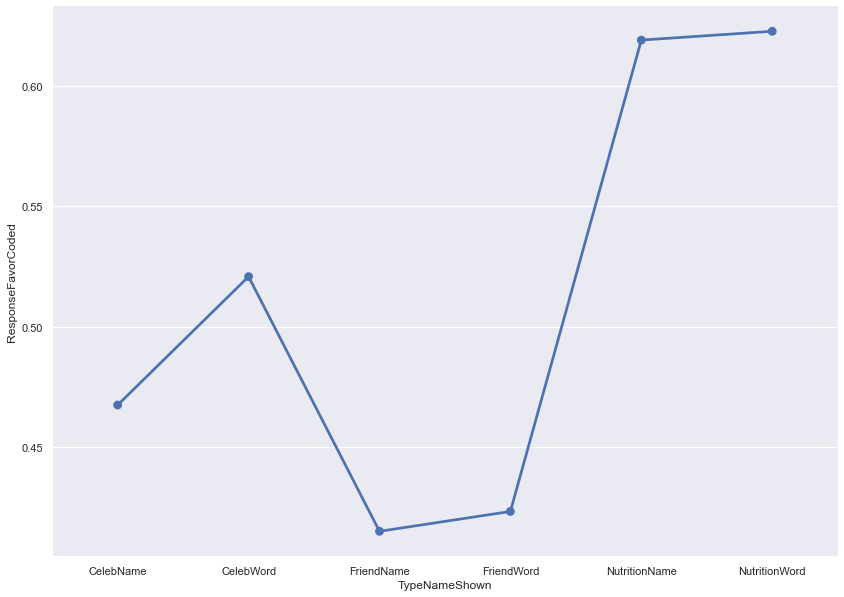

In [38]:
mean_props = longDF.groupby('TypeNameShown', as_index=False)['ResponseFavorCoded'].mean()

mean_props
sns.factorplot(y='ResponseFavorCoded',x='TypeNameShown',data=mean_props, height=8.27, aspect=11.7/8.27)


In [12]:
os.chdir("F://Moralizing Self-Regulation//Financial SelfReg Study//Name-Word Primes and Time Allocations//Social-Nonsocial")
df = pd.read_csv("BehavioralData.csv")

In [14]:
df.groupby('Condition')['ResponseFavorCoded'].mean()

Condition
Conceptual    0.446667
Relational    0.412769
Name: ResponseFavorCoded, dtype: float64